In [6]:
import pymongo
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [7]:
myclient = pymongo.MongoClient("localhost:27017")
mydb = myclient["GreenHouse"]
myValuescol = mydb["GreenHouse_Values"]
myHistorycol = mydb["GreenHouse_History"]

In [8]:
cursor = myValuescol.find()
df =  pd.DataFrame(list(cursor))
df["Date"] = pd.to_datetime(df["timestamp"], unit="s")
df.drop(["_id", "timestamp"], axis=1, inplace=True)

print(f"Data de inicio da monitoração: {df.iloc[0]['Date']}, data final da monitoração: {df.iloc[-1]['Date']}")
df.set_index(["Date"], inplace=True)
df.head()

Data de inicio da monitoração: 2022-03-11 01:21:42, data final da monitoração: 2022-03-18 01:25:24


,Temp,RH,Water_Level_Irrigation,Water_Level_Umidity,Soil_Moisture,LUX_Index
Date,,,,,,
2022-03-11 01:21:42,26.17,73.03,91,107,89,34
2022-03-11 01:21:48,26.13,73.03,91,105,89,34
2022-03-11 01:21:53,26.17,73.10,92,106,87,34
2022-03-11 01:21:58,26.17,73.10,92,105,87,34
2022-03-11 01:22:04,26.17,73.13,93,107,87,34


In [9]:
df_full = df.resample("1H").mean()
df_full.head()

,Temp,RH,Water_Level_Irrigation,Water_Level_Umidity,Soil_Moisture,LUX_Index
Date,,,,,,
2022-03-11 01:00:00,26.176651,72.161093,102.960465,107.513953,79.858140,30.427907
2022-03-11 02:00:00,26.190378,71.038429,106.536254,109.702417,78.463746,4.557402
2022-03-11 03:00:00,25.742630,74.007119,107.519263,111.261307,78.067002,0.000000
2022-03-11 04:00:00,25.657469,74.270823,41.236626,113.030864,74.901235,0.000000
2022-03-11 05:00:00,25.352221,76.443547,4.336811,114.825633,72.655738,10.178838


In [10]:
tam_ori = df.index.size

droprows = df.loc[df["LUX_Index"] < 0].index
df_clean = df.drop(droprows, axis=0, inplace=False)
print(f"Linhas removidas por leitura errada do sensor de lux: {len(droprows)}")

droprows = df_clean.loc[df_clean["Temp"] < 20].index
df_clean.drop(droprows, axis=0, inplace=True)
print(f"Linhas removidas por leitura errada do sensor de Temperatura: {len(droprows)}")

droprows = df_clean.loc[df_clean["Temp"] > 35].index
df_clean.drop(droprows, axis=0, inplace=True)
print(f"Linhas removidas por leitura errada do sensor de Temperatura: {len(droprows)}")

droprows = df_clean.loc[df_clean["RH"] > 100].index
df_clean.drop(droprows, axis=0, inplace=True)
print(f"Linhas removidas por leitura errada do sensor de umidade: {len(droprows)}")

df_clean.reset_index(inplace=True)
print(f"Tamanho original: {tam_ori}, Tamanho após tratamento:{df_clean.index.size}, Linhas removidas: {tam_ori - df_clean.index.size}")


df_clean.set_index(["Date"], inplace=True)
df_clean = df_clean.resample("1H").mean()
df_clean.head()

Linhas removidas por leitura errada do sensor de lux: 158
Linhas removidas por leitura errada do sensor de Temperatura: 24315
Linhas removidas por leitura errada do sensor de Temperatura: 16
Linhas removidas por leitura errada do sensor de umidade: 2
Tamanho original: 96215, Tamanho após tratamento:71724, Linhas removidas: 24491


,Temp,RH,Water_Level_Irrigation,Water_Level_Umidity,Soil_Moisture,LUX_Index
Date,,,,,,
2022-03-11 01:00:00,26.176651,72.161093,102.960465,107.513953,79.858140,30.427907
2022-03-11 02:00:00,26.190378,71.038429,106.536254,109.702417,78.463746,4.557402
2022-03-11 03:00:00,25.742630,74.007119,107.519263,111.261307,78.067002,0.000000
2022-03-11 04:00:00,25.657469,74.270823,41.236626,113.030864,74.901235,0.000000
2022-03-11 05:00:00,25.352221,76.443547,4.336811,114.825633,72.655738,10.178838


<AxesSubplot:title={'center':'Nivel de agua de Umidificador'}, xlabel='Data', ylabel='Portencagem do Recipiente'>

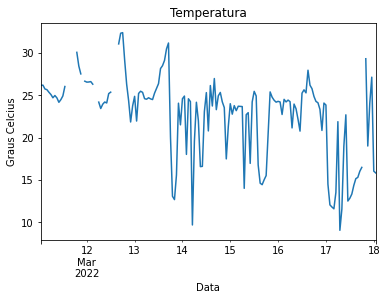

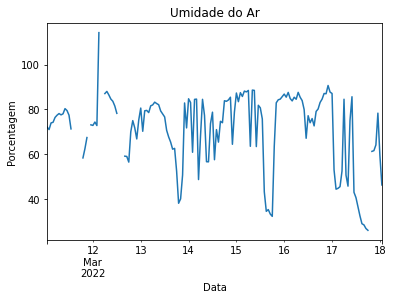

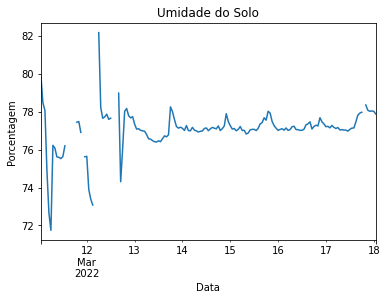

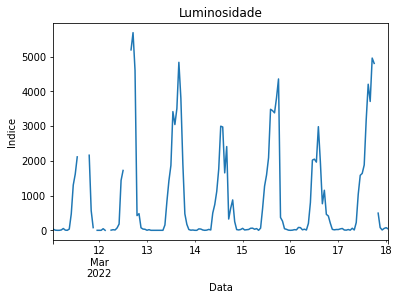

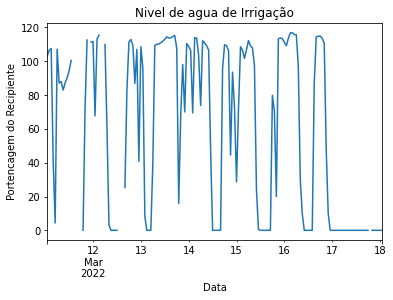

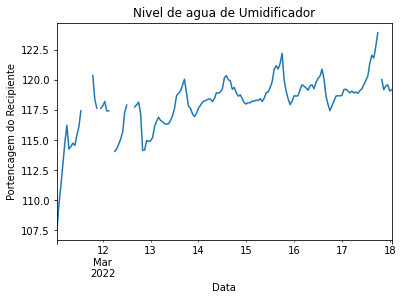

In [11]:
df_full.plot(y="Temp", title="Temperatura", xlabel="Data", ylabel="Graus Celcius", legend=False)
df_full.plot(y="RH", title="Umidade do Ar", xlabel="Data", ylabel="Porcentagem", legend=False)
df_full.plot(y="Soil_Moisture", title="Umidade do Solo", xlabel="Data", ylabel="Porcentagem", legend=False)
df_full.plot(y="LUX_Index", title="Luminosidade", xlabel="Data", ylabel="Indice", legend=False)

df_full.plot(y="Water_Level_Irrigation", title="Nivel de agua de Irrigação", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)
df_full.plot(y="Water_Level_Umidity", title="Nivel de agua de Umidificador", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)

<AxesSubplot:title={'center':'Nivel de agua de Umidificador'}, xlabel='Data', ylabel='Portencagem do Recipiente'>

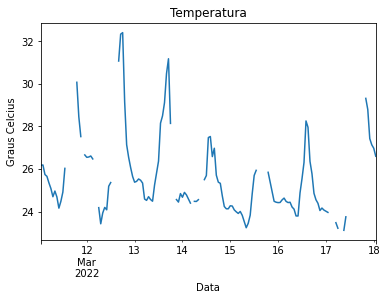

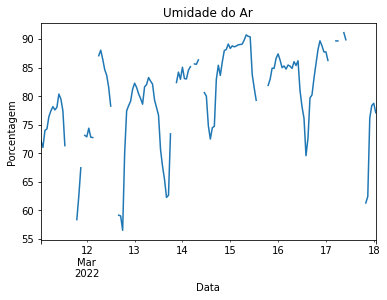

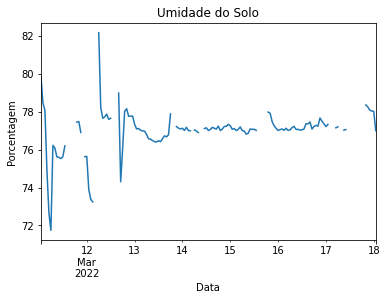

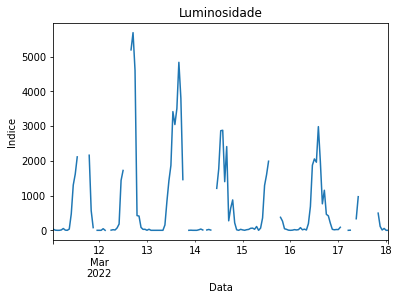

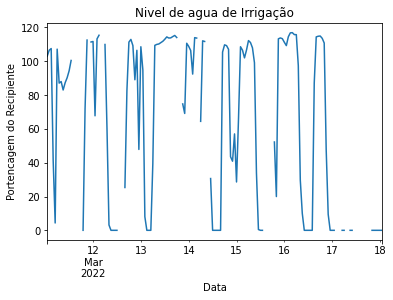

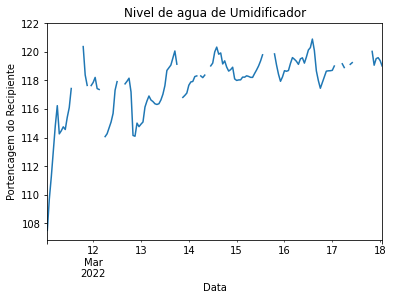

In [12]:
df_clean.plot(y="Temp", title="Temperatura", xlabel="Data", ylabel="Graus Celcius", legend=False)
df_clean.plot(y="RH", title="Umidade do Ar", xlabel="Data", ylabel="Porcentagem", legend=False)
df_clean.plot(y="Soil_Moisture", title="Umidade do Solo", xlabel="Data", ylabel="Porcentagem", legend=False)
df_clean.plot(y="LUX_Index", title="Luminosidade", xlabel="Data", ylabel="Indice", legend=False)

df_clean.plot(y="Water_Level_Irrigation", title="Nivel de agua de Irrigação", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)
df_clean.plot(y="Water_Level_Umidity", title="Nivel de agua de Umidificador", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)

<AxesSubplot:title={'center':'Nivel de água do Umidificador'}, xlabel='Data', ylabel='Portencagem do Recipiente'>

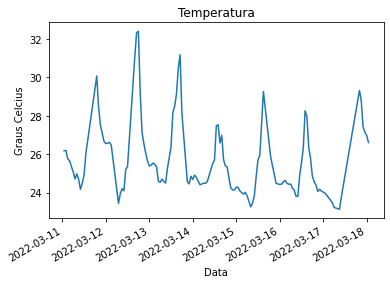

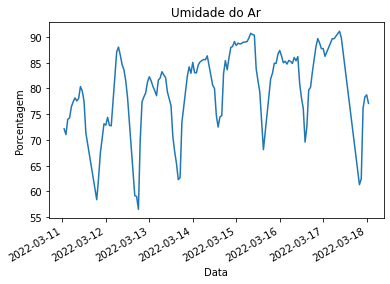

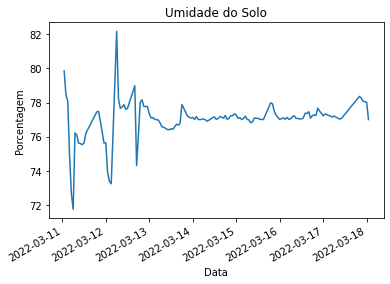

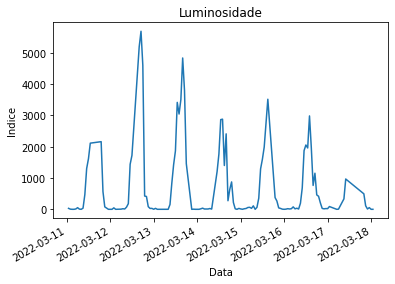

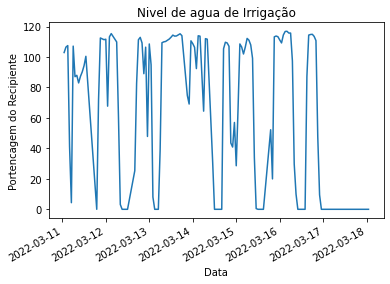

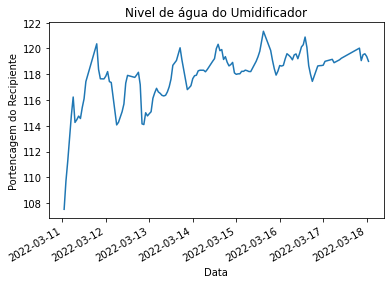

In [14]:
df_full_clean = df_clean.dropna()

df_full_clean.plot(y="Temp", title="Temperatura", xlabel="Data", ylabel="Graus Celcius", legend=False)
df_full_clean.plot(y="RH", title="Umidade do Ar", xlabel="Data", ylabel="Porcentagem", legend=False)
df_full_clean.plot(y="Soil_Moisture", title="Umidade do Solo", xlabel="Data", ylabel="Porcentagem", legend=False)
df_full_clean.plot(y="LUX_Index", title="Luminosidade", xlabel="Data", ylabel="Indice", legend=False)

df_full_clean.plot(y="Water_Level_Irrigation", title="Nivel de agua de Irrigação", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)
df_full_clean.plot(y="Water_Level_Umidity", title="Nivel de água do Umidificador", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)

In [ ]:
cursor = myHistorycol.find()
df =  pd.DataFrame(list(cursor))
df["Date"] = pd.to_datetime(df["timestamp"], unit="s")
df.drop(["_id", "timestamp"], axis=1, inplace=True)

print(f"Data de inicio do controle: {df.iloc[0]['Date']}, data final da monitoração: {df.iloc[-1]['Date']}")
df.set_index(["Date"], inplace=True)
df_full = df.resample("1H").mean()
df.head()

Data de inicio do controle: 2022-03-11 01:25:06, data final da monitoração: 2022-03-18 00:41:45


,Temp,RH,Soil_Moisture,LUX_Index,actions,total reward,reward
Date,,,,,,,
2022-03-11 01:25:06,26.1775,73.021667,82.416667,34.000000,"{'AC': 0.4592820107936859, 'heater': 0.5674945...",0,0
2022-03-11 01:26:07,26.1825,73.044167,81.500000,34.000000,"{'AC': 0.4592820107936859, 'heater': 0.5674945...",0,0
2022-03-11 01:26:08,26.1825,73.044167,81.500000,34.000000,"{'AC': 0.41335380971431734, 'heater': 0.510745...",0,0
2022-03-11 01:27:08,26.2025,73.309167,81.000000,33.666667,"{'AC': 0.41335380971431734, 'heater': 0.510745...",0,0
2022-03-11 01:27:09,26.2025,73.309167,81.000000,33.666667,"{'AC': 0.39681965732574465, 'heater': 0.490315...",0,0


In [ ]:
data = pd.DataFrame(pd.Series(df["actions"]).to_dict())
data = data.transpose()
data.reset_index(inplace=True)
data["Date"] = data["index"]
data.drop(["index"], axis=1, inplace=True)
data.set_index(["Date"], inplace=True)

data.head()

,AC,heater,humidifier,irrigation,light,ventilation
Date,,,,,,
2022-03-11 01:25:06,0.459282,0.567495,0.356247,0.584749,0.757041,0.759939
2022-03-11 01:26:07,0.459282,0.567495,0.356247,0.584749,0.757041,0.759939
2022-03-11 01:26:08,0.413354,0.510745,0.320622,0.526274,0.681337,0.683945
2022-03-11 01:27:08,0.413354,0.510745,0.320622,0.526274,0.681337,0.683945
2022-03-11 01:27:09,0.396820,0.490315,0.307798,0.505223,0.654084,0.656587


In [ ]:
#data["AC"].loc[data["AC"] > 0.8].count()
print(f"Quantidade de ativações do AC: {data['AC'].loc[data['AC'] > 0.8].count()}")
print(f"Quantidade de ativações do heater: {data['heater'].loc[data['heater'] > 0.8].count()}")
print(f"Quantidade de ativações do humidifier: {data['humidifier'].loc[data['humidifier'] > 0.8].count()}")
print(f"Quantidade de ativações do irrigation: {data['irrigation'].loc[data['irrigation'] > 0.8].count()}")
print(f"Quantidade de ativações do light: {data['AC'].loc[data['AC'] > 0.8].count()}")
print(f"Quantidade de ativações do ventilation: {data['ventilation'].loc[data['ventilation'] > 0.8].count()}")

Quantidade de ativações do AC: 1437
Quantidade de ativações do heater: 1506
Quantidade de ativações do humidifier: 1442
Quantidade de ativações do irrigation: 1294
Quantidade de ativações do light: 1437
Quantidade de ativações do ventilation: 1430


'\ndata_full = data.resample("30T").mean()\ndata_full.head()\n\ndata_full.plot(y="AC", title="Ativação do AC", xlabel="Data", ylabel="Nivel de ativação", legend=False)\ndata.plot(y="RH", title="Umidade do Ar", xlabel="Data", ylabel="Porcentagem", legend=False)\ndata.plot(y="Soil_Moisture", title="Umidade do Solo", xlabel="Data", ylabel="Porcentagem", legend=False)\ndata.plot(y="LUX_Index", title="Luminosidade", xlabel="Data", ylabel="Indice", legend=False)\n\ndata.plot(y="Water_Level_Irrigation", title="Temperatura", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)\ndata.plot(y="Water_Level_Umidity", title="Temperatura", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)\n'

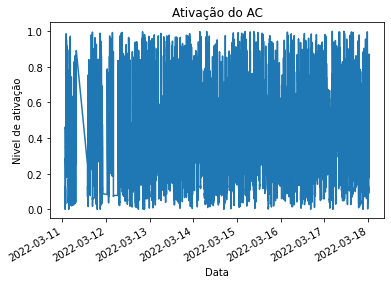

In [ ]:
data.plot(y="AC", title="Ativação do AC", xlabel="Data", ylabel="Nivel de ativação", legend=False)
"""
data_full = data.resample("30T").mean()
data_full.head()

data_full.plot(y="AC", title="Ativação do AC", xlabel="Data", ylabel="Nivel de ativação", legend=False)
data.plot(y="RH", title="Umidade do Ar", xlabel="Data", ylabel="Porcentagem", legend=False)
data.plot(y="Soil_Moisture", title="Umidade do Solo", xlabel="Data", ylabel="Porcentagem", legend=False)
data.plot(y="LUX_Index", title="Luminosidade", xlabel="Data", ylabel="Indice", legend=False)

data.plot(y="Water_Level_Irrigation", title="Temperatura", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)
data.plot(y="Water_Level_Umidity", title="Temperatura", xlabel="Data", ylabel="Portencagem do Recipiente", legend=False)
"""